## **Self-Supervised Learning: The Future of AI Without Labels italicized text**

In [ ]:
# 2.4 Visualizing the STL-10 Dataset Step-by-Step
# First, let's load and visualize STL-10:

import numpy as np

import torchvision

import matplotlib.pyplot as plt

from torchvision.datasets import STL10

import matplotlib.pyplot as plt

import numpy as np


# Load STL-10 dataset

dataset = STL10(root="./data", split="train", download=True)


100%|██████████| 2.64G/2.64G [43:10<00:00, 1.02MB/s]


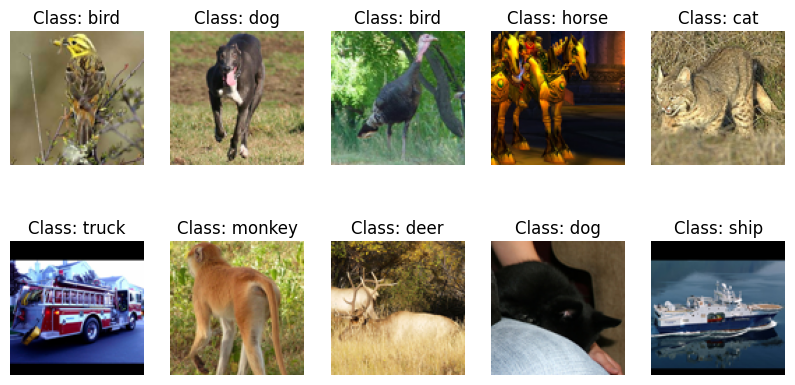

In [14]:
# Now, let's display 10 random images:

# Display 10 random images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    img, label = dataset[i]

    # Convert image to numpy array and ensure correct format for matplotlib (H, W, C)
    img = np.array(img)

    # Display the image
    ax.imshow(img)
    ax.set_title(f"Class: {dataset.classes[label]}")
    ax.axis("off")

plt.show()


In [21]:
# Example Code: Data Augmentation for Contrastive Learning

from torchvision import transforms

# Define transformations used in SimCLR
simclr_transforms = transforms.Compose([
    transforms.RandomResizedCrop(96),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor()
])


In [22]:
# Step 1: Load Data with Augmentations

from torch.utils.data import DataLoader

train_loader = DataLoader(STL10(root="./data", split="train", transform=simclr_transforms, download=True), batch_size=256, shuffle=True)

In [25]:
#Step 2: Define a Feature Extractor (ResNet-18)

import torch
import torchvision.models as models

class SimCLRFeatureExtractor(torch.nn.Module):
    def __init__(self):
        super(SimCLRFeatureExtractor, self).__init__()
        self.encoder = models.resnet18(pretrained=True)
        self.encoder.fc = torch.nn.Identity()  # Remove classification head

    def forward(self, x):
        return self.encoder(x)



In [27]:
# Step 3: Implementing the Projection Head

import torch

class ProjectionHead(torch.nn.Module):
    def __init__(self, input_dim=512, output_dim=128):
        super(ProjectionHead, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, 256)
        self.fc2 = torch.nn.Linear(256, output_dim)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [28]:
# This ensures strong augmentation to generate positive pairs for contrastive learning.
from torchvision import transforms

simclr_transforms = transforms.Compose([
    transforms.RandomResizedCrop(96),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor()
])


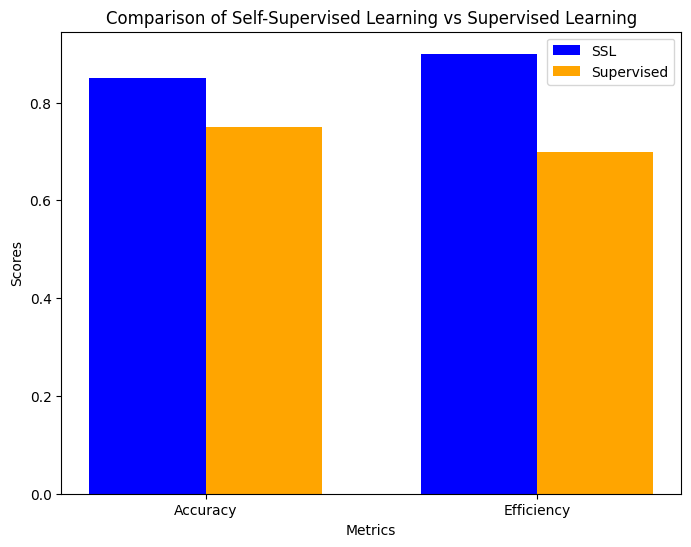

In [30]:

# Define the data (Accuracy and Efficiency scores for SSL vs Supervised Learning)
categories = ['Accuracy', 'Efficiency']
ssl_scores = [0.85, 0.9]  # Example values for SSL (Self-Supervised Learning)
sl_scores = [0.75, 0.7]   # Example values for Supervised Learning

# Set up the bar chart positions
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars_ssl = ax.bar(x - width/2, ssl_scores, width, label='SSL', color='blue')
bars_sl = ax.bar(x + width/2, sl_scores, width, label='Supervised', color='orange')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Self-Supervised Learning vs Supervised Learning')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.show()


In [31]:
import pandas as pd

# Define the comparison data
data = {
    'Metric': ['Accuracy', 'Efficiency'],
    'SSL': [0.85, 0.9],   # Example values for SSL (Self-Supervised Learning)
    'Supervised Learning': [0.75, 0.7]  # Example values for Supervised Learning
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
df


,Metric,SSL,Supervised Learning
0,Accuracy,0.85,0.75
1,Efficiency,0.90,0.70
